Exercise 1 
In Section 10.4 I describe convolution as the sum of shifted, scaled copies of a signal.
But in Section 10.3, when we multiply the DFT of the signal by the transfer function, that operation corresponds to circular convolution, which assumes that the signal is periodic. As a result, you might notice that the output contains an extra note at the beginning, which wraps around from the end.
Fortunately, there is a standard solution to this problem. If you add enough zeros to the end of the signal before computing the DFT, you can avoid the wrap-around effect.
Modify the example in chap10.ipynb and confirm that zero-padding eliminates the extra note at the beginning of the output.

在10.4節中，我將捲積描述為信號的平移，縮放副本的總和。
但是在10.3節中，當我們將信號的DFT與傳遞函數相乘時，該操作對應於循環卷積，後者假定信號是周期性的。結果，您可能會注意到輸出在開頭包含一個額外的音符，該音符從結尾開始迴繞。
幸運的是，有一個解決此問題的標準方法。如果在計算DFT之前在信號末尾添加足夠的零，則可以避免環繞效應。
修改chap10.ipynb中的示例，並確認零填充可消除輸出開始處的多餘音符。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

我將兩個信號截斷為2^16個元素，然後將它們零填充到2^17個。使用2的power可以使FFT算法最有效。

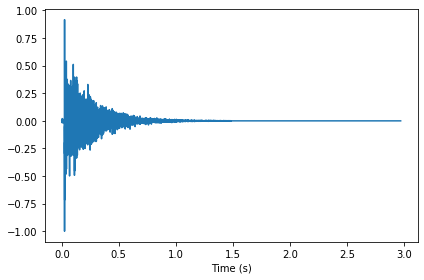

In [23]:
#  impulse response

from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16) #修的地方 信號截斷為2^16個元素
response.zero_pad(2**17) #修的地方 零填充到2^17個

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

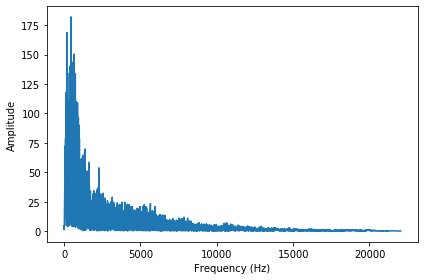

In [3]:
# response spectrum
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

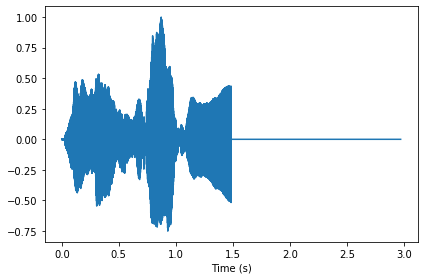

In [5]:
# violin signal
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)

violin.truncate(2**16) # 修的地方 信號截斷為2^16個元素
violin.zero_pad(2**17) # 修的地方 零填充到2^17個

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

In [6]:
# violin spectrum
spectrum = violin.make_spectrum()

In [7]:
# 現在我們可以將信號的DFT乘以傳遞函數，然後轉換回波形
output = (spectrum * transfer).make_wave()
output.normalize()

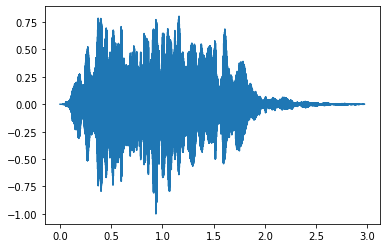

In [8]:
output.plot()

In [9]:
output.make_audio()

我們應該從np.convolve和scipy.signal.fftconvolve中獲得相同的結果。

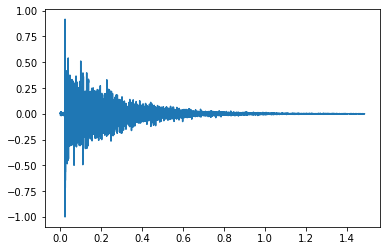

In [10]:
# response 擺脫零填充
response.truncate(2**16)
response.plot()

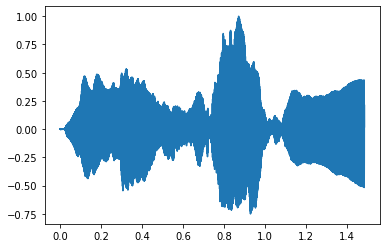

In [11]:
# violin 擺脫零填充
violin.truncate(2**16)
violin.plot()

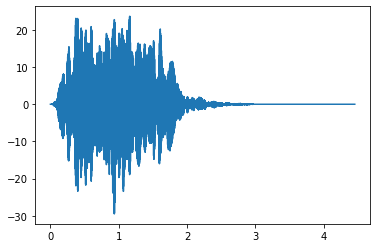

In [28]:
# 與np.convolve比較
output2 = violin.convolve(response)
output2.plot()

結果很像。

In [14]:
output2.make_audio()

聲音也很像。

In [15]:
len(output), len(output2)

(131072, 131071)

但結果並不等長。

scipy.signal.fftconvolve做同樣的事情，但是顧名思義，它使用了FFT，因此速度更快：

In [16]:
from thinkdsp import Wave

import scipy.signal
ys = scipy.signal.fftconvolve(violin.ys, response.ys)
output3 = Wave(ys, framerate=violin.framerate)

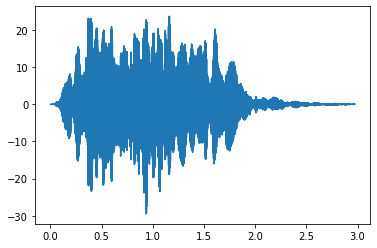

In [17]:
output3.plot()

結果看起來一樣。

In [18]:
output3.make_audio()

In [19]:
output2.max_diff(output3)

1.7763568394002505e-14

And within floating point error, they are the same